In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np

import gym
import stable_baselines
from stable_baselines import A2C, ACER, ACKTR, DQN, DDPG, SAC, PPO1, PPO2, TD3, TRPO
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.policies import MlpPolicy

from fakegym.fakegym import FakeGym
import importlib

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
class MyObservation():
    def __init__(self, env):
        self.env = env
        self.gps_actual = None
        self.gps_target = None
        self.distance = None
        self.touching = None

    def _update(self):
        self.gps_actual = self.env.state_object.gps_actual
        self.gps_target = self.env.state_object.gps_target
        self.distance = self.env.state_object.distance
        self.touching = self.env.state_object.touching

    def shape(self):
        """Make sure length is correct here.In this example:
        gps_actual: 2
        gps_target: 2
        distance:   4
        touching:   1
        =================
                   (9, )
        
        """
        return (9, )

    def get(self, env):
        """Get observation as numpy array."""
        self._update()
        
        arr = np.empty(0)
        arr = np.hstack((arr, np.array(self.gps_actual)))
        arr = np.hstack((arr, np.array(self.gps_target)))
        arr = np.hstack((arr, np.array(self.distance)))
        arr = np.hstack((arr, np.array(self.touching)))
        
        return arr
    

class MyEnv(FakeGym):
    def __init__(self, seed=None, N=10, num_of_sensors=4, obstacles_each=2,
                 step_range=(1, 1), action_type="discrete",
                 discrete_action_shaping="flatten", obs=MyObservation):
        super(MyEnv, self).__init__(seed, N, num_of_sensors, obstacles_each, step_range, action_type, discrete_action_shaping, obs)
        

    def calc_reward(self):
        """Calculate reward function.

        Idea(Mats):
        - negative reward for normal move so that james moves faster to goal
        - still lower negative reward if james gets closer to goal
        - high positive award for reaching it
        - high negative award to hitting a wall
        - epsilon only to divide never by 0

        """
        if self.gps_actual == self.gps_target:
            reward = 1000
        else:
            epsilon = 10**-5
            cost_step = 1
            max_distance = np.sqrt(2)*self.com.N
            dist_penalty = self.get_target_distance()+epsilon
            #cost_distance = (distance**0.4)/(distance)
            cost_distance = np.tanh(dist_penalty/(max_distance/2))
            reward_factor = -1
            reward = reward_factor * (cost_step * cost_distance)
            if self.state_object:
                reward = reward - 10
        return reward
        
        
    def check_done(self):
        if self.com.time_steps == 1000:
            return True
        if self.gps_actual == self.gps_target:
            return True
        return False


env = MyEnv()
check_env(env)

/home/ruili/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
time_steps = 4*10**4
reward_function = "nRewardtanh"
fake = "WebotFakeMini"
name = "TRPO_pj1"
model_name = "PPO_{}_{}_{}_{}".format(fake, name, reward_function, time_steps)

model = PPO1("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=time_steps, log_interval=100)
model.save("../models/keep/{}".format(model_name))
del model





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
********** Iteration 0 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00353 |      -0.01385 |      6.80e+04 |       0.00103 |       1.38540
     -0.01924 |      -0.01379 |      6.79e+04 |       0.00766 |       1.37933
     -0.02361 |      -0.01370 |      6.78e+04 |       0.01706 |       1.37050
     -0.02811 |      -0.01369 |      6.77e+04 |       0.01886 |       1.36866
Evaluating losses...
     -0.03079 |      -0.01372 |      6.76e+04 |       0.01578 |       1.37154
----------------------------------
| EpLenMean       | 87.5         |
| EpRewMean       | 93           |
| EpThisIter      | 2            |
| EpisodesSoFar   | 2            |
| TimeElapsed     | 0.426        |
| Timesteps

    -9.05e-05 |      -0.01381 |      2.86e+04 |      4.07e-05 |       1.38058
     -0.00295 |      -0.01381 |      2.84e+04 |       0.00068 |       1.38108
     -0.01016 |      -0.01380 |      2.82e+04 |       0.00372 |       1.38021
     -0.01060 |      -0.01376 |      2.80e+04 |       0.01001 |       1.37595
Evaluating losses...
     -0.01265 |      -0.01373 |      2.79e+04 |       0.01291 |       1.37333
----------------------------------
| EpLenMean       | 130          |
| EpRewMean       | -348         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 3            |
| TimeElapsed     | 1.32         |
| TimestepsSoFar  | 1280         |
| ev_tdlam_before | -0.00697     |
| loss_ent        | 1.373332     |
| loss_kl         | 0.012911548  |
| loss_pol_entpen | -0.01373332  |
| loss_pol_surr   | -0.012646246 |
| loss_vf_loss    | 27909.9      |
----------------------------------
********** Iteration 5 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |  

      0.00100 |      -0.01342 |      2.78e+04 |       0.00018 |       1.34243
     -0.00357 |      -0.01337 |      2.77e+04 |       0.00120 |       1.33745
     -0.00807 |      -0.01331 |      2.76e+04 |       0.00336 |       1.33120
     -0.01224 |      -0.01325 |      2.74e+04 |       0.00694 |       1.32481
Evaluating losses...
     -0.01307 |      -0.01323 |      2.74e+04 |       0.00978 |       1.32278
----------------------------------
| EpLenMean       | 158          |
| EpRewMean       | -710         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 17           |
| TimeElapsed     | 3.06         |
| TimestepsSoFar  | 3328         |
| ev_tdlam_before | -0.000382    |
| loss_ent        | 1.3227804    |
| loss_kl         | 0.009780014  |
| loss_pol_entpen | -0.013227804 |
| loss_pol_surr   | -0.013067177 |
| loss_vf_loss    | 27357.125    |
----------------------------------
********** Iteration 13 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss | 

      0.00231 |      -0.01202 |      2.79e+04 |       0.00107 |       1.20159
     -0.00241 |      -0.01184 |      2.78e+04 |       0.00629 |       1.18434
     -0.00524 |      -0.01172 |      2.77e+04 |       0.01056 |       1.17192
     -0.00943 |      -0.01174 |      2.76e+04 |       0.00769 |       1.17350
Evaluating losses...
     -0.00719 |      -0.01176 |      2.75e+04 |       0.00661 |       1.17559
----------------------------------
| EpLenMean       | 247          |
| EpRewMean       | -1.75e+03    |
| EpThisIter      | 0            |
| EpisodesSoFar   | 19           |
| TimeElapsed     | 4.82         |
| TimestepsSoFar  | 5376         |
| ev_tdlam_before | -5.6e-05     |
| loss_ent        | 1.1755868    |
| loss_kl         | 0.0066109532 |
| loss_pol_entpen | -0.011755869 |
| loss_pol_surr   | -0.007187333 |
| loss_vf_loss    | 27549.217    |
----------------------------------
********** Iteration 21 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss | 

     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00066 |      -0.00987 |      2.64e+04 |      7.02e-05 |       0.98662
     -0.00109 |      -0.00998 |      2.64e+04 |       0.00132 |       0.99771
     -0.00331 |      -0.01040 |      2.63e+04 |       0.00550 |       1.03957
     -0.00324 |      -0.01063 |      2.62e+04 |       0.00901 |       1.06251
Evaluating losses...
     -0.00406 |      -0.01053 |      2.61e+04 |       0.00816 |       1.05311
----------------------------------
| EpLenMean       | 318          |
| EpRewMean       | -2.6e+03     |
| EpThisIter      | 0            |
| EpisodesSoFar   | 21           |
| TimeElapsed     | 6.55         |
| TimestepsSoFar  | 7424         |
| ev_tdlam_before | 4.59e-06     |
| loss_ent        | 1.053108     |
| loss_kl         | 0.008155184  |
| loss_pol_entpen | -0.010531079 |
| loss_pol_surr   | -0.004060786 |
| loss_vf_loss    | 26146.043    |
----------------------------------
********** Iteration 

********** Iteration 36 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00062 |      -0.01234 |      1.33e+05 |       0.00031 |       1.23355
     -0.01128 |      -0.01210 |      1.33e+05 |       0.00307 |       1.20997
     -0.02008 |      -0.01187 |      1.33e+05 |       0.00802 |       1.18731
     -0.02396 |      -0.01174 |      1.33e+05 |       0.01155 |       1.17388
Evaluating losses...
     -0.02686 |      -0.01170 |      1.32e+05 |       0.01261 |       1.16991
----------------------------------
| EpLenMean       | 254          |
| EpRewMean       | -1.8e+03     |
| EpThisIter      | 5            |
| EpisodesSoFar   | 37           |
| TimeElapsed     | 8.34         |
| TimestepsSoFar  | 9472         |
| ev_tdlam_before | -0.000995    |
| loss_ent        | 1.1699095    |
| loss_kl         | 0.012608081  |
| loss_pol_entpen | -0.011699094 |
| loss_pol_surr   | -0.026863365 |
| loss_vf_loss    | 132468.23    |
-----

********** Iteration 44 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00192 |      -0.01206 |      2.16e+05 |      6.68e-05 |       1.20641
     -0.00889 |      -0.01200 |      2.15e+05 |       0.00168 |       1.20015
     -0.00759 |      -0.01189 |      2.15e+05 |       0.01170 |       1.18868
     -0.01164 |      -0.01198 |      2.15e+05 |       0.01058 |       1.19763
Evaluating losses...
     -0.01701 |      -0.01210 |      2.14e+05 |       0.00509 |       1.20967
----------------------------------
| EpLenMean       | 213          |
| EpRewMean       | -1.35e+03    |
| EpThisIter      | 9            |
| EpisodesSoFar   | 54           |
| TimeElapsed     | 10.1         |
| TimestepsSoFar  | 11520        |
| ev_tdlam_before | -0.000212    |
| loss_ent        | 1.2096703    |
| loss_kl         | 0.005093433  |
| loss_pol_entpen | -0.012096703 |
| loss_pol_surr   | -0.017014967 |
| loss_vf_loss    | 214343.94    |
-----

********** Iteration 52 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00084 |      -0.01234 |      6.18e+04 |      2.01e-05 |       1.23394
     -0.00389 |      -0.01235 |      6.18e+04 |       0.00087 |       1.23481
     -0.01158 |      -0.01241 |      6.17e+04 |       0.00319 |       1.24114
     -0.01513 |      -0.01253 |      6.17e+04 |       0.00373 |       1.25296
Evaluating losses...
     -0.01829 |      -0.01260 |      6.17e+04 |       0.00381 |       1.25986
----------------------------------
| EpLenMean       | 215          |
| EpRewMean       | -1.37e+03    |
| EpThisIter      | 2            |
| EpisodesSoFar   | 62           |
| TimeElapsed     | 11.8         |
| TimestepsSoFar  | 13568        |
| ev_tdlam_before | 0.00246      |
| loss_ent        | 1.2598569    |
| loss_kl         | 0.0038083552 |
| loss_pol_entpen | -0.012598569 |
| loss_pol_surr   | -0.018289212 |
| loss_vf_loss    | 61668.816    |
-----

********** Iteration 60 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00031 |      -0.01267 |      2.64e+04 |       0.00013 |       1.26718
     -0.00410 |      -0.01268 |      2.63e+04 |       0.00169 |       1.26770
     -0.00709 |      -0.01267 |      2.63e+04 |       0.00405 |       1.26719
     -0.00664 |      -0.01268 |      2.62e+04 |       0.00477 |       1.26784
Evaluating losses...
     -0.00825 |      -0.01269 |      2.62e+04 |       0.00439 |       1.26878
----------------------------------
| EpLenMean       | 210          |
| EpRewMean       | -1.3e+03     |
| EpThisIter      | 0            |
| EpisodesSoFar   | 70           |
| TimeElapsed     | 13.6         |
| TimestepsSoFar  | 15616        |
| ev_tdlam_before | -3e-05       |
| loss_ent        | 1.2687837    |
| loss_kl         | 0.004387327  |
| loss_pol_entpen | -0.012687837 |
| loss_pol_surr   | -0.008252945 |
| loss_vf_loss    | 26166.188    |
-----

********** Iteration 68 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00027 |      -0.01187 |      2.52e+04 |      1.19e-05 |       1.18748
     -0.00051 |      -0.01193 |      2.52e+04 |       0.00067 |       1.19303
     -0.00244 |      -0.01203 |      2.51e+04 |       0.00368 |       1.20268
     -0.00420 |      -0.01200 |      2.51e+04 |       0.00263 |       1.19968
Evaluating losses...
     -0.00555 |      -0.01196 |      2.50e+04 |       0.00168 |       1.19606
-----------------------------------
| EpLenMean       | 202           |
| EpRewMean       | -1.22e+03     |
| EpThisIter      | 0             |
| EpisodesSoFar   | 86            |
| TimeElapsed     | 15.3          |
| TimestepsSoFar  | 17664         |
| ev_tdlam_before | 1.07e-05      |
| loss_ent        | 1.1960555     |
| loss_kl         | 0.0016828324  |
| loss_pol_entpen | -0.011960555  |
| loss_pol_surr   | -0.0055484213 |
| loss_vf_loss    | 25047.70

********** Iteration 76 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00045 |      -0.01244 |      4.96e+04 |      2.21e-05 |       1.24430
     -0.00513 |      -0.01253 |      4.96e+04 |       0.00072 |       1.25310
     -0.00798 |      -0.01265 |      4.96e+04 |       0.00294 |       1.26474
     -0.00869 |      -0.01272 |      4.95e+04 |       0.00540 |       1.27213
Evaluating losses...
     -0.00893 |      -0.01275 |      4.95e+04 |       0.00671 |       1.27524
-----------------------------------
| EpLenMean       | 191           |
| EpRewMean       | -1.1e+03      |
| EpThisIter      | 1             |
| EpisodesSoFar   | 103           |
| TimeElapsed     | 17.1          |
| TimestepsSoFar  | 19712         |
| ev_tdlam_before | 0.000918      |
| loss_ent        | 1.2752391     |
| loss_kl         | 0.0067095878  |
| loss_pol_entpen | -0.0127523905 |
| loss_pol_surr   | -0.008932497  |
| loss_vf_loss    | 49510.56

********** Iteration 84 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00166 |      -0.01229 |      2.47e+04 |       0.00047 |       1.22884
     -0.00545 |      -0.01252 |      2.47e+04 |       0.00337 |       1.25178
     -0.00776 |      -0.01262 |      2.46e+04 |       0.00519 |       1.26200
     -0.00735 |      -0.01253 |      2.46e+04 |       0.00402 |       1.25278
Evaluating losses...
     -0.00840 |      -0.01249 |      2.46e+04 |       0.00345 |       1.24878
----------------------------------
| EpLenMean       | 192          |
| EpRewMean       | -1.1e+03     |
| EpThisIter      | 0            |
| EpisodesSoFar   | 108          |
| TimeElapsed     | 18.8         |
| TimestepsSoFar  | 21760        |
| ev_tdlam_before | 5.96e-07     |
| loss_ent        | 1.248775     |
| loss_kl         | 0.0034454977 |
| loss_pol_entpen | -0.01248775  |
| loss_pol_surr   | -0.008398712 |
| loss_vf_loss    | 24576.305    |
-----

********** Iteration 92 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00122 |      -0.01077 |      4.80e+04 |      5.34e-05 |       1.07712
      0.00069 |      -0.01071 |      4.79e+04 |       0.00021 |       1.07053
     -0.00033 |      -0.01071 |      4.79e+04 |       0.00021 |       1.07126
     -0.00153 |      -0.01076 |      4.79e+04 |       0.00013 |       1.07625
Evaluating losses...
     -0.00251 |      -0.01081 |      4.79e+04 |       0.00012 |       1.08102
-----------------------------------
| EpLenMean       | 171           |
| EpRewMean       | -860          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 121           |
| TimeElapsed     | 20.5          |
| TimestepsSoFar  | 23808         |
| ev_tdlam_before | 0.0005        |
| loss_ent        | 1.0810162     |
| loss_kl         | 0.00012177575 |
| loss_pol_entpen | -0.010810161  |
| loss_pol_surr   | -0.0025074594 |
| loss_vf_loss    | 47879.18

********** Iteration 100 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00058 |      -0.01195 |      2.36e+05 |      6.75e-05 |       1.19476
     -0.00500 |      -0.01194 |      2.36e+05 |       0.00091 |       1.19440
     -0.00592 |      -0.01195 |      2.35e+05 |       0.00175 |       1.19467
     -0.00863 |      -0.01197 |      2.35e+05 |       0.00101 |       1.19664
Evaluating losses...
     -0.00928 |      -0.01198 |      2.34e+05 |       0.00077 |       1.19828
----------------------------------
| EpLenMean       | 147          |
| EpRewMean       | -608         |
| EpThisIter      | 8            |
| EpisodesSoFar   | 143          |
| TimeElapsed     | 22.3         |
| TimestepsSoFar  | 25856        |
| ev_tdlam_before | 0.00481      |
| loss_ent        | 1.1982787    |
| loss_kl         | 0.0007736791 |
| loss_pol_entpen | -0.011982787 |
| loss_pol_surr   | -0.009278636 |
| loss_vf_loss    | 234313.55    |
----

********** Iteration 108 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00026 |      -0.01291 |      2.47e+04 |       0.00038 |       1.29129
     -0.00347 |      -0.01295 |      2.47e+04 |       0.00152 |       1.29516
     -0.00460 |      -0.01291 |      2.47e+04 |       0.00232 |       1.29106
     -0.00566 |      -0.01288 |      2.47e+04 |       0.00177 |       1.28791
Evaluating losses...
     -0.00632 |      -0.01288 |      2.46e+04 |       0.00124 |       1.28807
----------------------------------
| EpLenMean       | 153          |
| EpRewMean       | -671         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 158          |
| TimeElapsed     | 23.9         |
| TimestepsSoFar  | 27904        |
| ev_tdlam_before | 0.000571     |
| loss_ent        | 1.2880702    |
| loss_kl         | 0.0012384427 |
| loss_pol_entpen | -0.012880702 |
| loss_pol_surr   | -0.006318666 |
| loss_vf_loss    | 24638.705    |
----

********** Iteration 116 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -9.40e-05 |      -0.01260 |      2.52e+04 |      3.64e-05 |       1.26013
     -0.00278 |      -0.01257 |      2.52e+04 |       0.00051 |       1.25650
     -0.00354 |      -0.01251 |      2.52e+04 |       0.00087 |       1.25095
     -0.00485 |      -0.01247 |      2.52e+04 |       0.00104 |       1.24683
Evaluating losses...
     -0.00598 |      -0.01246 |      2.52e+04 |       0.00120 |       1.24603
-----------------------------------
| EpLenMean       | 152           |
| EpRewMean       | -664          |
| EpThisIter      | 0             |
| EpisodesSoFar   | 167           |
| TimeElapsed     | 25.7          |
| TimestepsSoFar  | 29952         |
| ev_tdlam_before | -0.00108      |
| loss_ent        | 1.2460303     |
| loss_kl         | 0.0011988839  |
| loss_pol_entpen | -0.012460304  |
| loss_pol_surr   | -0.0059835985 |
| loss_vf_loss    | 25181.3

********** Iteration 124 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00018 |      -0.01167 |      2.64e+05 |      7.01e-06 |       1.16700
     -0.00234 |      -0.01166 |      2.64e+05 |       0.00012 |       1.16645
     -0.00519 |      -0.01165 |      2.63e+05 |       0.00050 |       1.16529
     -0.00512 |      -0.01165 |      2.62e+05 |       0.00084 |       1.16468
Evaluating losses...
     -0.00610 |      -0.01165 |      2.62e+05 |       0.00088 |       1.16486
-----------------------------------
| EpLenMean       | 140           |
| EpRewMean       | -539          |
| EpThisIter      | 11            |
| EpisodesSoFar   | 187           |
| TimeElapsed     | 27.4          |
| TimestepsSoFar  | 32000         |
| ev_tdlam_before | -0.000385     |
| loss_ent        | 1.1648581     |
| loss_kl         | 0.00087810063 |
| loss_pol_entpen | -0.011648581  |
| loss_pol_surr   | -0.006096989  |
| loss_vf_loss    | 261760.

********** Iteration 132 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00058 |      -0.01196 |      7.80e+04 |      2.76e-05 |       1.19607
      0.00010 |      -0.01197 |      7.80e+04 |       0.00014 |       1.19689
     -0.00144 |      -0.01198 |      7.79e+04 |      9.63e-05 |       1.19774
     -0.00309 |      -0.01198 |      7.79e+04 |       0.00015 |       1.19791
Evaluating losses...
     -0.00355 |      -0.01198 |      7.79e+04 |       0.00031 |       1.19797
-----------------------------------
| EpLenMean       | 91.1          |
| EpRewMean       | 6.86          |
| EpThisIter      | 3             |
| EpisodesSoFar   | 224           |
| TimeElapsed     | 29.1          |
| TimestepsSoFar  | 34048         |
| ev_tdlam_before | 0.0481        |
| loss_ent        | 1.1979749     |
| loss_kl         | 0.000314259   |
| loss_pol_entpen | -0.0119797485 |
| loss_pol_surr   | -0.003549615  |
| loss_vf_loss    | 77941.0

********** Iteration 140 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00025 |      -0.01216 |      6.94e+04 |      3.27e-06 |       1.21592
     -0.00075 |      -0.01215 |      6.93e+04 |      3.85e-05 |       1.21509
     -0.00196 |      -0.01214 |      6.91e+04 |       0.00020 |       1.21407
     -0.00219 |      -0.01214 |      6.90e+04 |       0.00026 |       1.21387
Evaluating losses...
     -0.00301 |      -0.01214 |      6.89e+04 |       0.00019 |       1.21391
-----------------------------------
| EpLenMean       | 102           |
| EpRewMean       | -119          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 239           |
| TimeElapsed     | 30.9          |
| TimestepsSoFar  | 36096         |
| ev_tdlam_before | -0.074        |
| loss_ent        | 1.2139097     |
| loss_kl         | 0.00018758228 |
| loss_pol_entpen | -0.012139097  |
| loss_pol_surr   | -0.0030062348 |
| loss_vf_loss    | 68912.8

********** Iteration 148 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -8.06e-05 |      -0.01254 |      2.56e+04 |      5.76e-07 |       1.25378
     -0.00037 |      -0.01253 |      2.54e+04 |      5.51e-06 |       1.25306
     -0.00098 |      -0.01252 |      2.52e+04 |      2.15e-05 |       1.25205
     -0.00112 |      -0.01251 |      2.50e+04 |      4.81e-05 |       1.25096
Evaluating losses...
     -0.00116 |      -0.01250 |      2.49e+04 |      6.14e-05 |       1.25048
----------------------------------
| EpLenMean       | 116          |
| EpRewMean       | -275         |
| EpThisIter      | 0            |
| EpisodesSoFar   | 245          |
| TimeElapsed     | 32.6         |
| TimestepsSoFar  | 38144        |
| ev_tdlam_before | -0.178       |
| loss_ent        | 1.2504802    |
| loss_kl         | 6.137617e-05 |
| loss_pol_entpen | -0.012504801 |
| loss_pol_surr   | -0.001159288 |
| loss_vf_loss    | 24881.59     |
----

********** Iteration 156 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -9.42e-07 |      -0.01073 |      2.62e+04 |      2.14e-08 |       1.07252
    -1.78e-05 |      -0.01072 |      2.62e+04 |      3.21e-08 |       1.07244
    -3.16e-05 |      -0.01072 |      2.62e+04 |      9.98e-08 |       1.07230
    -2.05e-05 |      -0.01072 |      2.62e+04 |      1.70e-07 |       1.07225
Evaluating losses...
    -2.87e-05 |      -0.01072 |      2.62e+04 |      1.19e-07 |       1.07229
------------------------------------
| EpLenMean       | 104            |
| EpRewMean       | -137           |
| EpThisIter      | 0              |
| EpisodesSoFar   | 265            |
| TimeElapsed     | 34.4           |
| TimestepsSoFar  | 40192          |
| ev_tdlam_before | -0.000835      |
| loss_ent        | 1.0722859      |
| loss_kl         | 1.1851335e-07  |
| loss_pol_entpen | -0.010722859   |
| loss_pol_surr   | -2.8725713e-05 |
| loss_vf_loss 

In [76]:
modelnRewardtanh = PPO1.load("../models/keep/{}".format(model_name))
step_tanh = np.zeros(5000)

for i in range(5000):
    env = MyEnv(seed = i, N=10)
    obs = env.reset()
    done = False
    for _ in range(200):
        action, _states = modelnRewardtanh.predict(obs)
        obs, rewards, done, info = env.step(action)
        #env.render()
        if done is True:
            step_tanh[i] = _+1
            break 

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/ruili/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [78]:
modelnReward2 = PPO1.load("../models/keep/{}".format("PPO_WebotFakeMini_TRPO_pj1_nReward2_40000"))
step_2 = np.zeros(5000)

for i in range(5000):
    env = MyEnv(seed = i, N=10)
    obs = env.reset()
    done = False
    for _ in range(200):
        action, _states = modelnReward2.predict(obs)
        obs, rewards, done, info = env.step(action)
        #env.render()
        if done is True:
            step_2[i] = _+1
            break

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/ruili/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Text(0, 0.5, 'time')

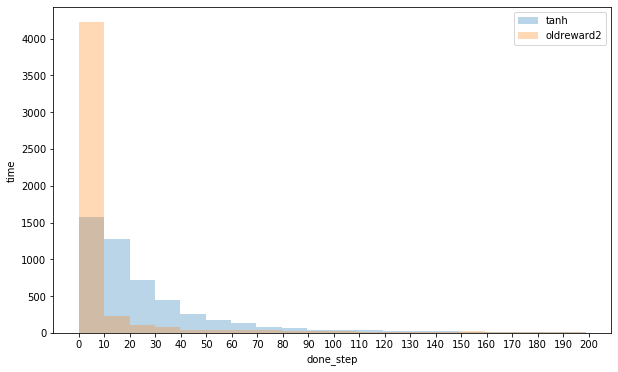

In [79]:
import matplotlib.pyplot as plt

kwargs = dict(alpha=0.3, bins=8)
plt.figure(figsize=(10,6))
plt.hist(step_tanh, bins=20, alpha=0.3, label = "tanh")
plt.hist(step_2, bins=20, alpha=0.3, label = "oldreward2")
plt.legend()
my_x_ticks = np.arange(0, 210, 10)
plt.xticks(my_x_ticks)
plt.xlabel("done_step")
plt.ylabel("time")